<a href="https://colab.research.google.com/github/Esoujanya/LGMVIP-DataScience/blob/main/Task2_Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task2**

Stock Market Prediction And Forecasting Using Stacked LSTM

**Importing all required** **libraries** 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pandas as pd
import numpy as np
import math 
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Data Sets/stockmarket.csv")

In [ ]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Displaying information about dataset**

In [ ]:
data.head

<bound method NDFrame.head of            Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0    2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1    2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2    2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3    2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4    2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...         ...     ...     ...     ...     ...     ...                   ...   
2030 2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2031 2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2032 2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2033 2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2034 2010-07-21  122.10  123.00  121.05  121.10  121.55                658666  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes  

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

**Sorting the data according to data**

In [ ]:
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


**Plotting graph for date and closing stock**

Text(0, 0.5, 'Close')

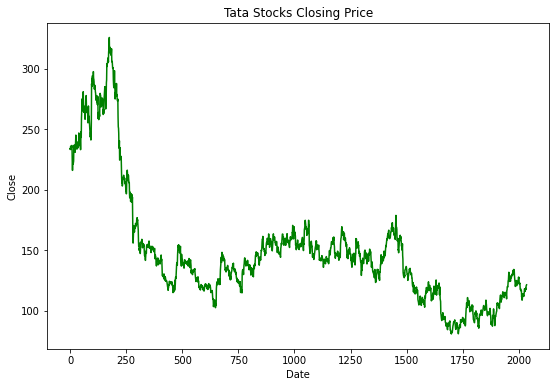

In [ ]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(data['Close'],'g')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close',fontsize=10)

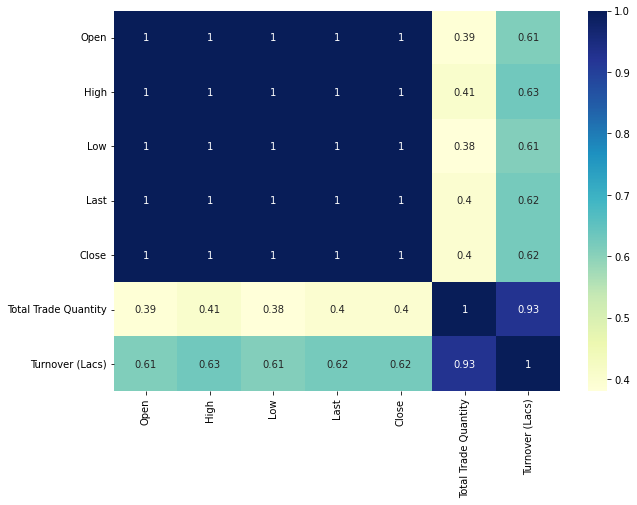

In [ ]:
dcorr = data.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [ ]:
data=data.iloc[:,0:5]
data

,Date,Open,High,Low,Last
2034,2010-07-21,122.10,123.00,121.05,121.10
2033,2010-07-22,120.30,122.00,120.25,120.75
2032,2010-07-23,121.80,121.95,120.25,120.35
2031,2010-07-26,120.10,121.00,117.10,117.10
2030,2010-07-27,117.60,119.50,112.00,118.80
...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00
3,2018-09-25,233.30,236.75,232.00,236.25
2,2018-09-26,240.00,240.00,232.50,235.00
1,2018-09-27,234.55,236.80,231.10,233.80


In [ ]:
training_set=data.iloc[:,1:2].values
training_set

array([[122.1 ],
       [120.3 ],
       [121.8 ],
       ...,
       [240.  ],
       [234.55],
       [234.05]])

**Scaling of Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
data_training_scaled=scaler.fit_transform(training_set)

In [ ]:
features_set = []
labels= []
for i in range(60,586):
   features_set.append(data_training_scaled[i-60:i,0])
   labels.append(data_training_scaled[i,0])    

In [ ]:
features_set,labels=np.array(features_set),np.array(labels)

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0],features_set.shape[1],1))
features_set.shape

(526, 60, 1)

**Building the LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
model=Sequential() 

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')    

In [ ]:
model.fit(features_set,labels,epochs=50,batch_size=20)    

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 12/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 13/50
27/27 [==============================

In [ ]:
data_testing_complete = pd.read_excel('/content/drive/MyDrive/Data Sets/stockmarket.csv')
data_testing_processed= data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


**Predicting of the data**

In [ ]:
data_total= pd.concat((data['Open'],data['Open']),axis=0)
test_inputs=data_total[len(data_total) - len(data)- 60:].values
test_inputs.shape

(2095,)

In [ ]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scaler.transform(test_inputs)
test_features=[]
for i in range(60,89):
    test_features.append(test_inputs[i-60:i,0])
test_features=np.array(test_features)
test_features=np.reshape(test_features, (test_features.shape[0],test_features.shape[1],1))
test_features.shape

(29, 60, 1)

In [ ]:
predictions = model.predict(test_features)
predictions

array([[[0.7437145 ],
        [0.8106245 ],
        [0.7962287 ],
        ...,
        [0.64436334],
        [0.6222628 ],
        [0.6202352 ]],

       [[0.8106245 ],
        [0.7962287 ],
        [0.7652068 ],
        ...,
        [0.6222628 ],
        [0.6202352 ],
        [0.16626115]],

       [[0.7962287 ],
        [0.7652068 ],
        [0.7589213 ],
        ...,
        [0.6202352 ],
        [0.16626115],
        [0.15896188]],

       ...,

       [[0.6332117 ],
        [0.6307786 ],
        [0.63341445],
        ...,
        [0.13341443],
        [0.15145986],
        [0.14152473]],

       [[0.6307786 ],
        [0.63341445],
        [0.6159773 ],
        ...,
        [0.15145986],
        [0.14152473],
        [0.15044607]],

       [[0.63341445],
        [0.6159773 ],
        [0.6240876 ],
        ...,
        [0.14152473],
        [0.15044607],
        [0.15369019]]], dtype=float32)

In [ ]:
X_train=data[0:1256]
Y_train=data[1:1257]
print(X_train.shape)
print(Y_train.shape)

(1256, 5)
(1256, 5)


In [ ]:
X_train

,Date,Open,High,Low,Last
2034,2010-07-21,122.1,123.00,121.05,121.10
2033,2010-07-22,120.3,122.00,120.25,120.75
2032,2010-07-23,121.8,121.95,120.25,120.35
2031,2010-07-26,120.1,121.00,117.10,117.10
2030,2010-07-27,117.6,119.50,112.00,118.80
...,...,...,...,...,...
783,2015-07-30,137.7,137.70,135.50,137.15
782,2015-07-31,136.0,142.80,135.35,140.00
781,2015-08-03,141.4,143.85,140.25,140.80
780,2015-08-04,143.4,144.75,141.00,143.05


**The np.random.randn function**

In [ ]:
np.random.seed(1)
np.random.randn(3,3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

**Draw a single number from the normal distribution**

In [ ]:
np.random.normal(1)

0.7506296245225899

**Draw a five numbers from the normal distribution**

In [ ]:
np.random.normal(5)

6.4621079370449745

**Plotting result**

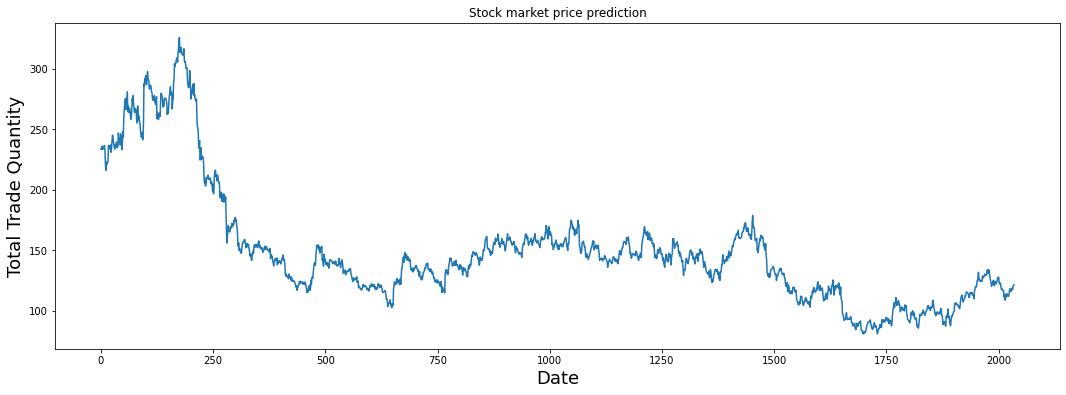

In [ ]:
plt.figure(figsize = (18,6))
plt.title("Stock market price prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

In [ ]:
data["Date"]=pd.to_datetime(data.Date)
data.index=data['Date']

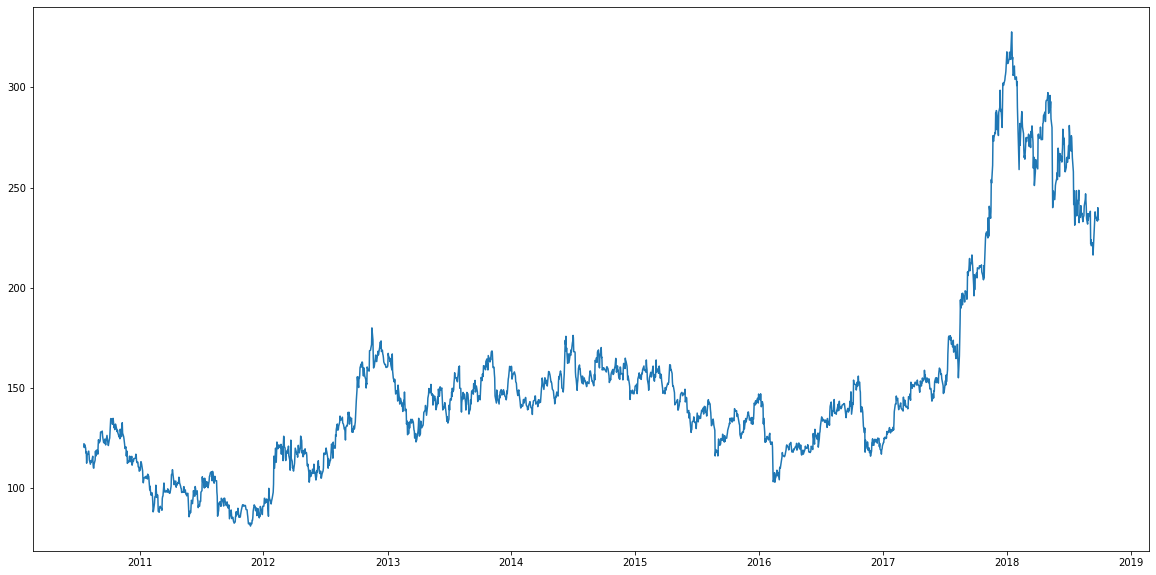

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['Open'],label='ClosePriceHist')

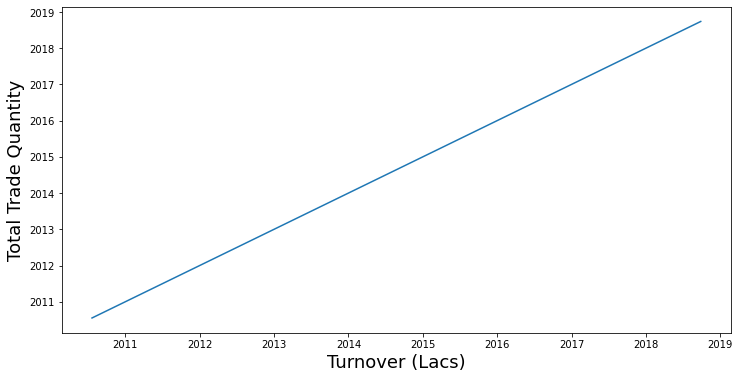

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

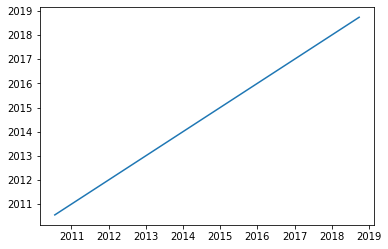

In [ ]:
data['Turnover (Lacs)']=pd.to_datetime(data.Date)
data.index=data['Turnover (Lacs)']

plt.plot(data['Turnover (Lacs)'],label='ClosePriceHist')